In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly
import datetime as dt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
stock = "POWERGRID.NS"
start = dt.datetime(2000,1,1)
end = dt.datetime(2025,12,31)
df = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545422,35.424689,26.900117,29.051480,855215656
2007-10-08,30.879337,33.645375,30.685229,33.645375,126671715
2007-10-09,32.982159,33.273319,29.229407,30.895498,116725709
2007-10-10,33.289505,33.968883,32.998344,33.839477,67931378
2007-10-11,37.009907,38.821581,32.998345,38.821581,106320954


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-05-12,309.049988,311.100006,304.049988,304.049988,7145884
2025-05-13,298.450012,308.750000,298.000000,305.000000,17988336
2025-05-14,295.950012,300.549988,294.049988,299.200012,10359258
2025-05-15,299.649994,300.399994,291.049988,295.899994,22640626
2025-05-16,300.200012,302.200012,295.500000,300.000000,16760462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4340 entries, 2007-10-05 to 2025-05-16
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4340 non-null   float64
 1   (High, POWERGRID.NS)    4340 non-null   float64
 2   (Low, POWERGRID.NS)     4340 non-null   float64
 3   (Open, POWERGRID.NS)    4340 non-null   float64
 4   (Volume, POWERGRID.NS)  4340 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 203.4 KB


In [6]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4340.000000,4340.000000,4340.000000,4340.000000,4.340000e+03
mean,86.096004,87.217366,84.987921,86.132014,1.194311e+07
std,72.982922,73.863993,72.062678,72.964849,2.033781e+07
min,19.001741,20.312206,17.036044,20.213921,0.000000e+00
25%,36.766338,37.288268,36.228704,36.826758,4.879694e+06
50%,64.275818,66.009420,62.394391,63.562485,8.510012e+06
75%,85.758268,87.009788,84.853657,85.868875,1.379453e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [8]:
df = df.reset_index()

In [9]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv('powergrid.csv')
data01 = pd.read_csv('powergrid.csv')

In [11]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [12]:
df = df.drop(['Date'],axis=1)

C:\Users\MAIN-FRAME\AppData\Local\Temp\ipykernel_2432\3445417830.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



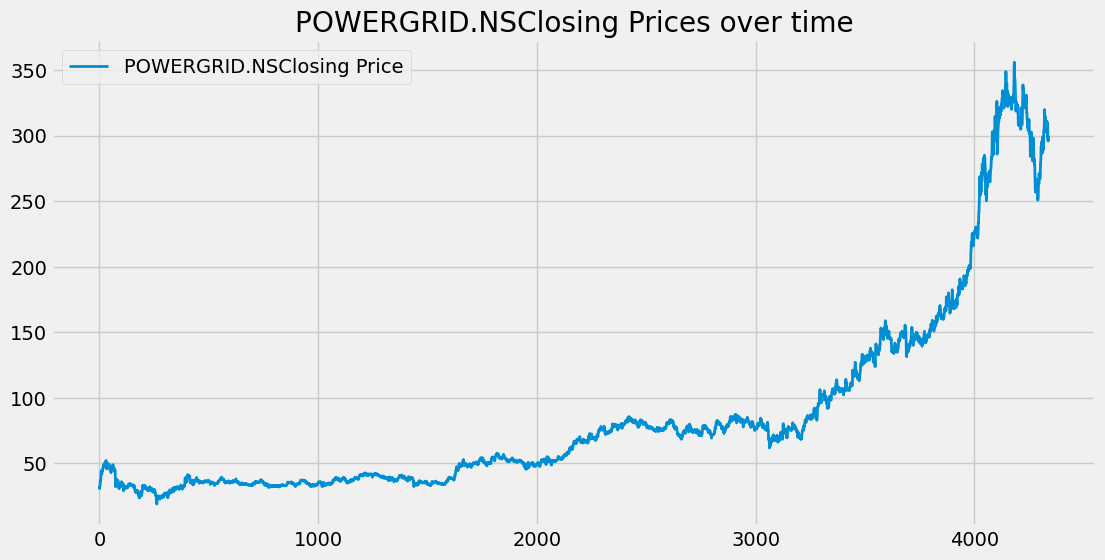

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f'{stock}Closing Price', linewidth = 2)
plt.title(f'{stock}Closing Prices over time')
plt.legend()
plt.show()

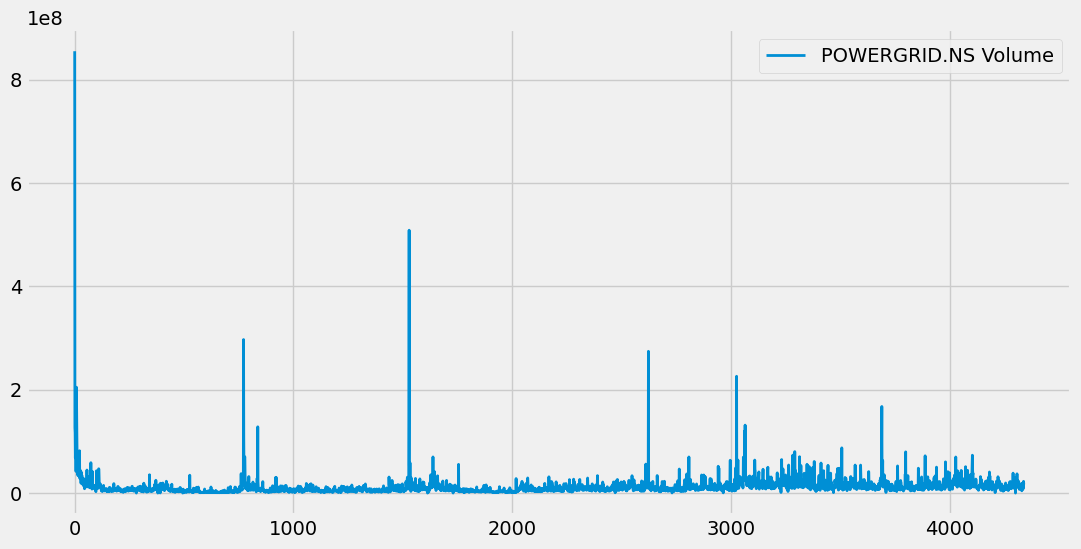

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'],label=f'{stock} Volume', linewidth = 2)
plt.legend()
plt.show()

In [15]:
ma100 = df.Close.rolling(100).mean()

In [16]:
ma200 = df.Close.rolling(200).mean()

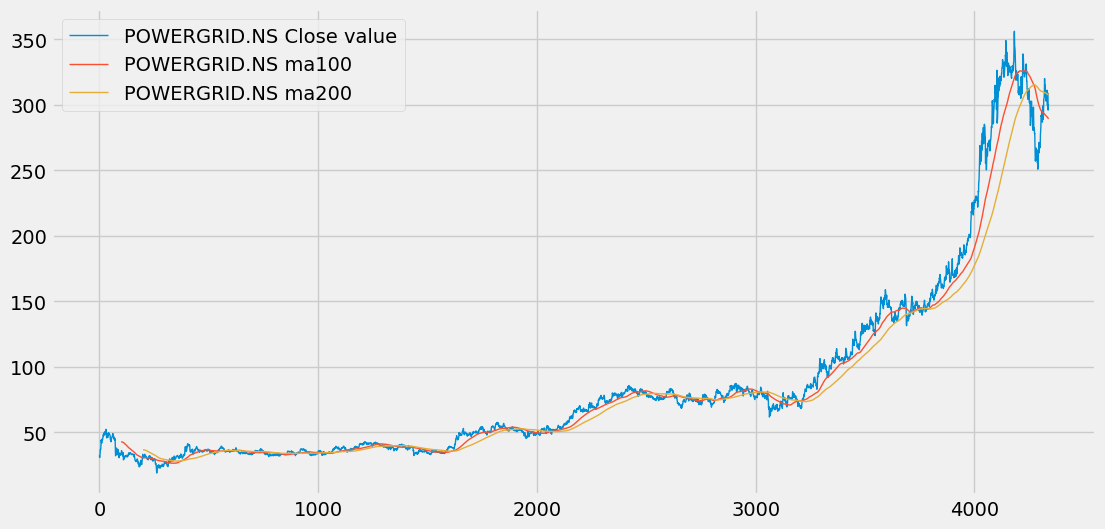

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f'{stock} Close value',linewidth=1)
plt.plot(ma100,label=f'{stock} ma100',linewidth=1)
plt.plot(ma200,label=f'{stock} ma200',linewidth=1)
plt.legend()
plt.show()

In [18]:
ema100 = df.Close.ewm(span=100,adjust=False).mean()
ema200 = df.Close.ewm(span=200,adjust=False).mean()

In [19]:
df.pct_change()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,NaN,NaN,NaN,NaN,NaN
1,-0.051193,-0.050228,1.407099e-01,0.158129,-0.851883
2,0.068098,-0.011058,-4.744373e-02,-0.081731,-0.078518
3,0.009319,0.020905,1.289433e-01,0.095288,-0.418026
4,0.111759,0.142857,3.276535e-08,0.147228,0.565123
...,...,...,...,...,...
4335,0.032576,0.026563,2.580970e-02,0.013500,-0.403590
4336,-0.034299,-0.007554,-1.989800e-02,0.003125,1.517300
4337,-0.008377,-0.026559,-1.325507e-02,-0.019016,-0.424112


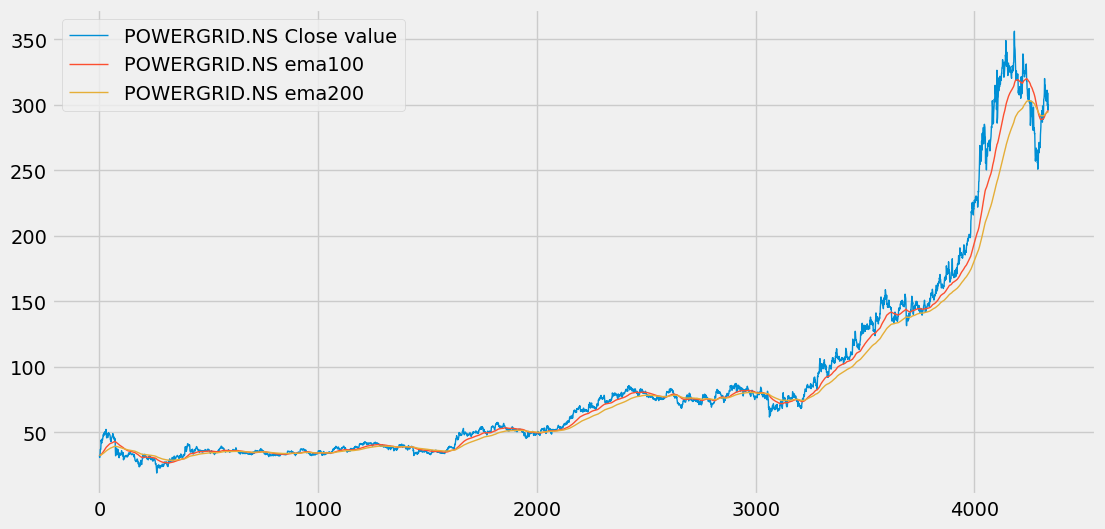

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'],label=f'{stock} Close value',linewidth=1)
plt.plot(ema100,label=f'{stock} ema100',linewidth=1)
plt.plot(ema200,label=f'{stock} ema200',linewidth=1)
plt.legend()
plt.show()

In [21]:
# training and testing
data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

In [22]:
data_training.shape

(3038, 1)

In [23]:
data_testing.shape

(1302, 1)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [25]:
data_training_array = scaler.fit_transform(data_training)

In [26]:
data_training_array

array([[0.1980859 ],
       [0.17371824],
       [0.20447349],
       ...,
       [0.86634872],
       [0.88780188],
       [0.87269424]])

In [27]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [28]:
x_train.shape

(2938, 100, 1)

In [29]:
# model building
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [30]:
model = Sequential()

model .add(LSTM(units = 50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model .add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model .add(LSTM(units = 80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model .add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model .add(Dense(units=1))


c:\Python 3.12.9\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - loss: 0.0789
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - loss: 0.0101
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - loss: 0.0074
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 0.0078
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 134ms/step - loss: 0.0073
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0075
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 0.0067
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - loss: 0.0059
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - loss: 0.0053
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - loss: 0.0057
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - loss: 0.0052
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - loss: 0.0044
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 142ms/step - loss: 0.0050
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - loss: 0.0043
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)

In [35]:
input_data = scaler.fit_transform(final_df)

In [36]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)

In [37]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test),np.array(y_test)

In [38]:
x_test.shape

(1302, 100, 1)

In [39]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


In [40]:
y_predicted.shape

(1302, 1)

In [41]:
scaler.scale_

array([0.00339719])

In [42]:
scaler_factor = 1/0.00339719
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

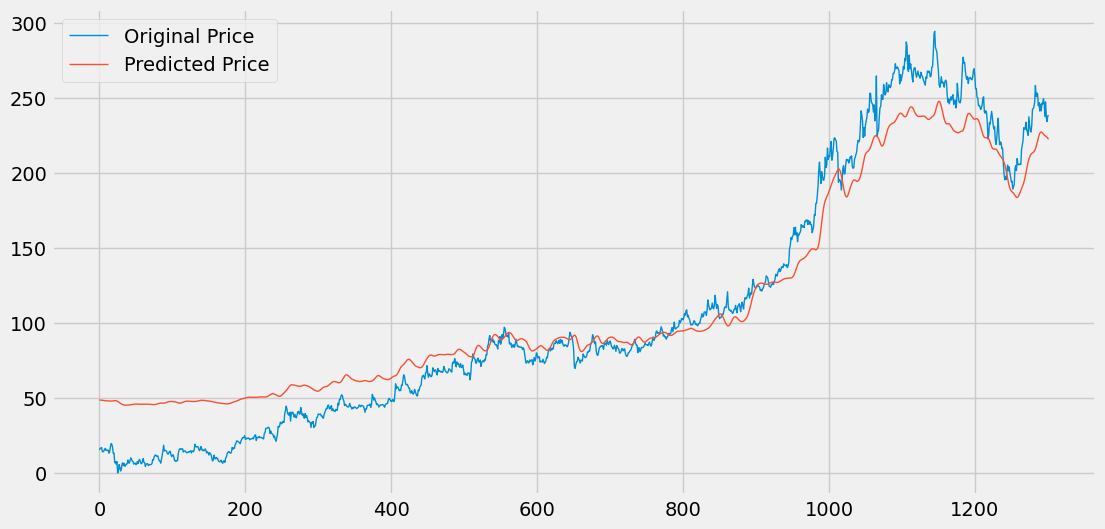

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,label='Original Price',linewidth=1)
plt.plot(y_predicted,label='Predicted Price',linewidth=1)
plt.legend()
plt.show()

In [44]:
model.save('stock_dl_model.h5')